In [8]:
# investigating hyperspectral compressed sensing results
import numpy as np
from matplotlib import pyplot as plt
#import hyperspy.api as hs
from PIL import Image
import matplotlib

%config Completer.use_jedi = False
%matplotlib inline

In [3]:
# load white image
#fpath_white = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Other\allwhite.tif'
#im_white = np.array(Image.open(fpath_white).convert('L'))

# load reconstructed datacube
#fpath_cube = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\March_2021_recon algos\trial_nobg_CS.csv'
fpath_cube = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\March_2021_recon algos\recon_inv2.csv'
#fpath_cube = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\March_2021_recon algos\trial1_reordered.csv'
#fpath_cube = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\March_2021_recon algos\trial2_noinv.csv'

datacube = np.genfromtxt(fpath_cube,delimiter=',')
datacube = datacube.reshape(301,301,63,order='F') # need the order to make compatible with matlab save function
#datacube = datacube.reshape(1024,1024,63,order='F') # need the order to make compatible with matlab save function

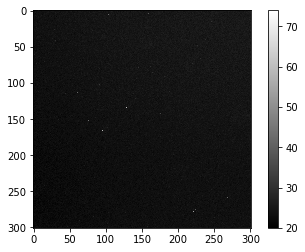

In [276]:
# Check background images
fpath_bg = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\bg3.png'
im_bg3 = np.array(Image.open(fpath_bg).convert('L'))[600:901,820:1121]
plt.imshow(im_bg,cmap='gray')
plt.colorbar()

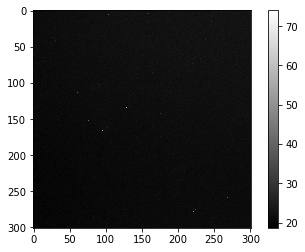

In [285]:
plt.imshow(np.mean((im_bg1,im_bg2,im_bg3),axis=0),cmap='gray')
plt.colorbar()

Text(0.5, 1.0, 'Region image (no pattern)')

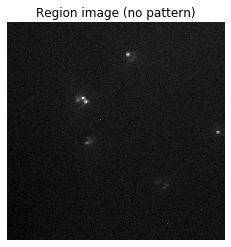

In [421]:
# view reconstructed region
im_white_sub = im_white[600:901,820:1121]
plt.imshow(im_white_sub,cmap='gray')
plt.axis('off')
plt.title('Region image (no pattern)')

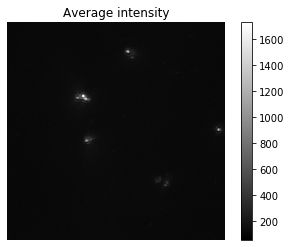

In [101]:
# view average intensity
#%matplotlib qt
plt.imshow(np.mean(datacube,axis=2),cmap='gray')
plt.axis('off')
plt.title('Average intensity')
plt.colorbar()

In [327]:
np.shape(datacube)

(301, 301, 63)

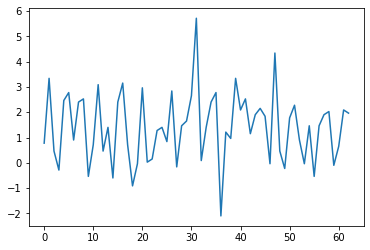

In [245]:
#110 108
# [row,col,pattern]
%matplotlib inline
# column = np.mean(datacube[47:50,:,:],axis=2)
# roi = np.mean(column,axis=1)
roi = datacube[47,172,:]
plt.plot(roi)
plt.show()

In [293]:
int(1/2)

0

In [120]:
def plot_roi(datacube,i=0,j=0,box_width=10,axs=None,return_roi=False,plot=True):
    """
    i = column index
    j = row index
    """
    i = i-int(box_width/2)
    j = j-int(box_width/2)
    
    # Get average spectrum at roi
    roi = datacube[j:j+box_width,i:i+box_width,:]
    avg = np.mean(roi,axis=0)
    avg = np.mean(avg,axis=0)
        
    if plot == True:
        if axs == None:
            fig,axs = plt.subplots(ncols=2,figsize=(8,4))

        # Plot intensity image
        axs[0].imshow(np.mean(datacube,axis=2),cmap='gray')
        # Plot ROI marker
        #axs[0].plot([i,i,i+box_width,i+box_width,i],[j,j+box_width,j+box_width,j,j],'r-',markersize=15,markeredgewidth=2,alpha=.8)
        
        #axs[0].set_title('Region of interest: (%i, %i) %ix%i' % (i,j,box_width,box_width))
        axs[0].axis('off')

        

        axs[1].plot(np.arange(1,64),avg)
        axs[1].set_xlabel('Band number')
        axs[1].set_ylabel('Intensity')
        #axs[1].set_ylim([-700,3000])

        plt.tight_layout()
    
    if return_roi == True:
        return avg


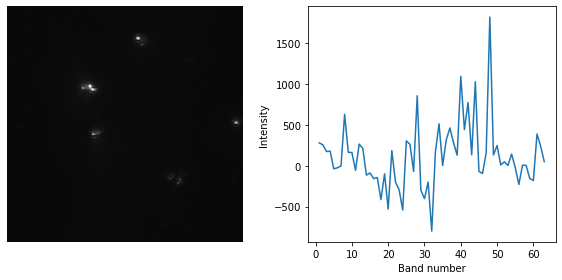

In [121]:
f= plot_roi(datacube,i=220,j=150,box_width=5,return_roi=True,plot=True)
#plot_roi(datacube,i=105,j=100,box_width=5,return_roi=False,plot=True)

Text(0, 0.5, 'Intensity')

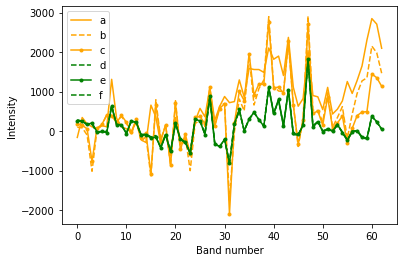

In [119]:

plt.plot(a,color='orange')
plt.plot(b,'--',color='orange')
plt.plot(c,'.-',color='orange')
plt.plot(d,'--',color='g')
plt.plot(e,'.-',color='g')
plt.plot(f,'--',color='g')
    
plt.legend(['a','b','c','d','e','f'])
plt.xlabel('Band number')
plt.ylabel('Intensity')

In [23]:
rois = []
for n in range(300):
    #for m in range(50):
    roi = plot_roi(datacube,i=0,j=n,box_width=1,return_roi=True,plot=False)
    rois.append(roi)

Text(0, 0.5, 'Intensity')

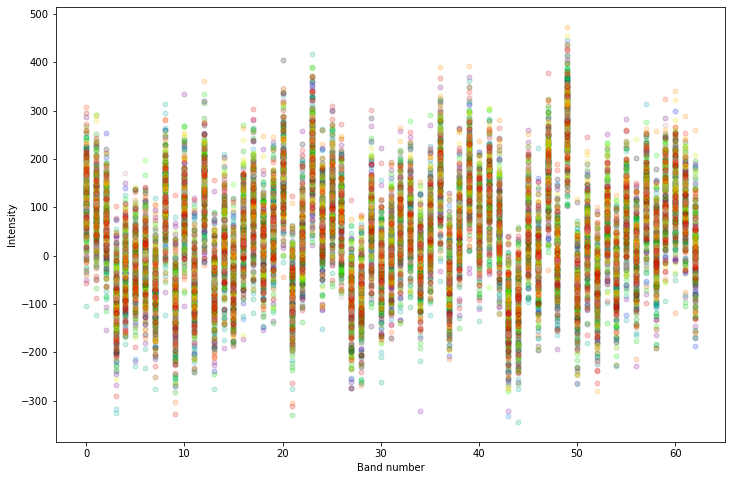

In [24]:
import matplotlib
plt.figure(figsize=(12,8))
cmap = matplotlib.cm.get_cmap('nipy_spectral')

for i,r in enumerate(rois):
    c = cmap((i+1)/len(rois))
    plt.plot(r,'.',color=c,alpha=.2,markersize=10)
    
plt.xlabel('Band number')
plt.ylabel('Intensity')
#plt.title('Individual spectra')

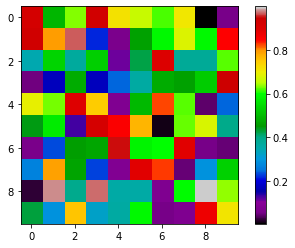

In [390]:
plt.imshow(np.random.rand(10,10),cmap='nipy_spectral')
plt.colorbar()

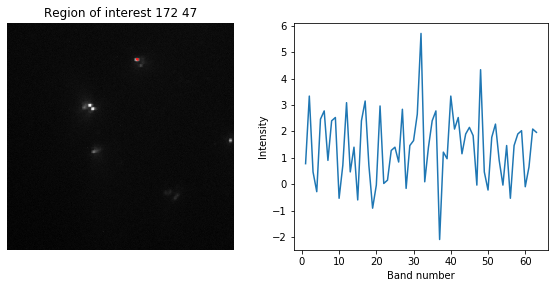

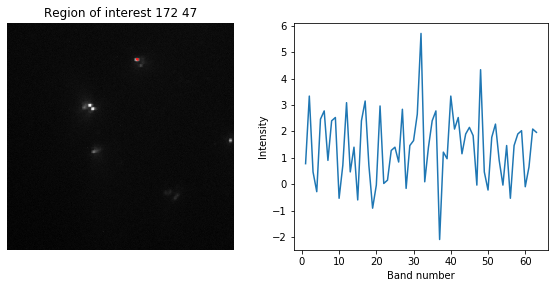

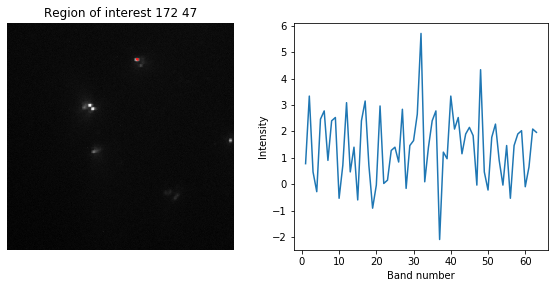

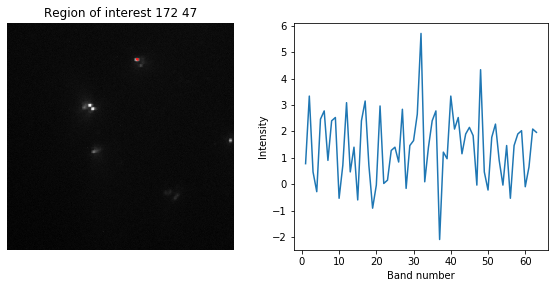

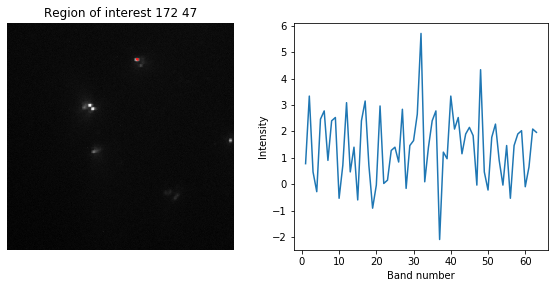

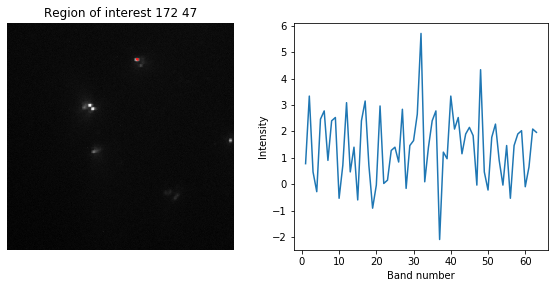

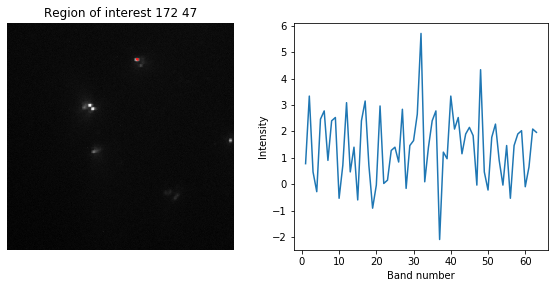

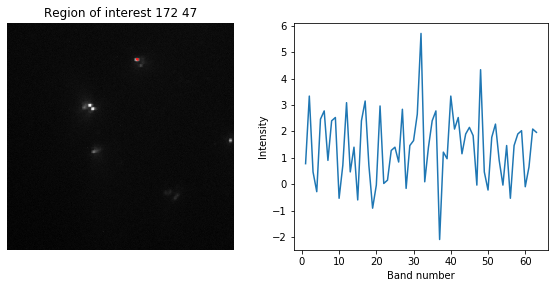

In [216]:
j = 47
for i in np.arange(300,step=40):
    i=172
    box_width = 1
    fig,axs = plt.subplots(ncols=2,figsize=(8,4))

    axs[0].imshow(np.mean(datacube,axis=2),cmap='gray')
    axs[0].plot([i,i,i+box_width,i+box_width,i],[j,j+box_width,j+box_width,j,j],'r-',markersize=15,markeredgewidth=2,alpha=.8)
    axs[0].set_title('Region of interest: (%i %i) %ix%i' % (i,j,box_width,box_width))
    axs[0].axis('off')

    roi = datacube[j:j+box_width,i:i+box_width,:]
    avg = np.mean(roi,axis=0)
    avg = np.mean(avg,axis=0)

    axs[1].plot(np.arange(1,64),avg)
    axs[1].set_xlabel('Band number')
    axs[1].set_ylabel('Intensity')
    #axs[1].set_ylim([-0.1,0.5])

    plt.tight_layout()

Text(0.5, 1.0, 'Average spectrum')

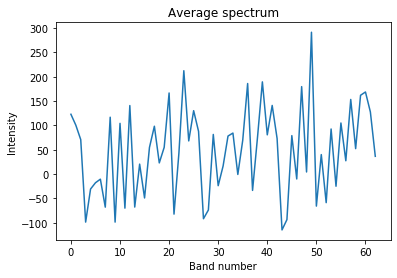

In [19]:
#%matplotlib qt
avg = np.mean(datacube,axis=0)
avg = np.mean(avg,axis=0)
plt.plot(avg)
plt.xlabel('Band number')
plt.ylabel('Intensity')
plt.title('Average spectrum')

In [130]:
np.argmax(np.argmax(datacube,axis=1))

9815

In [131]:
9815/300

32.71666666666667

In [5]:
from os import listdir
from os.path import isfile, join


folder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p1'

onlyfiles = [f for f in listdir(folder) if isfile(join(folder, f))]

In [157]:
for j in range(10):
    folder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p' + str(j+1)
    print(folder)

C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p1
C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p2
C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p3
C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p4
C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p5
C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p6
C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p7
C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p8
C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p9
C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p10


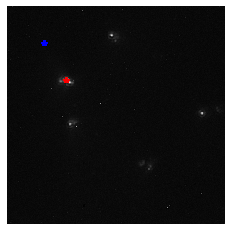

In [6]:
%matplotlib inline
all_1 = []
all_2 = []
for j in range(10):
    folder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p' + str(j+1)
    onlyfiles = [f for f in listdir(folder) if isfile(join(folder, f))]
    
    val1s = []
    val2s = []
    for i in range(5):
        fname = folder + r'\\' + onlyfiles[i]
        im = plt.imread(fname)[600:901,820:1121]
        plt.imshow(im,cmap='gray')
        x,y  = 81,101
        plt.plot(x,y,'r*')
        plt.plot(50,50,'b*')
        plt.axis('off')
        val1 = im[y,x]
        val2 = im[50,50]
        val1s.append(val1)
        val2s.append(val2)
    all_1.append(val1s)
    all_2.append(val2s)

Text(0, 0.5, 'Intensity value')

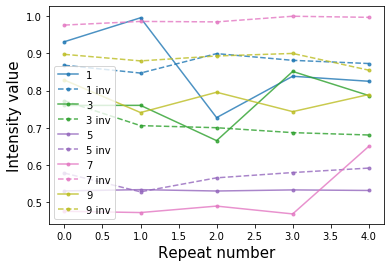

In [24]:
cmap = matplotlib
cmap = matplotlib.cm.get_cmap('tab10')

for i,vs in enumerate(all_1):
    lab = i+1 
    c = cmap(i/10)
    linestyle = '-'
    if lab % 2 == 0:
        c = cmap((i-1)/10)
        linestyle = '--'
        lab = str(lab-1) + ' inv'
    plt.plot(vs, '.',label=lab,color=c,linestyle = linestyle,alpha=.8)
plt.legend()

plt.xlabel('Repeat number',fontsize=15)
plt.ylabel('Intensity value',fontsize=15)

9019.33
9079.04
9176.94
9667.1
9541.79
12980.8
13239.1
13259.5
13081.6
12402.7
9537.9
9595.95
9704.95
10135.7
10222.5
10294.3
10192.6
10181.7
10214.1
10245.8
10270.0
10433.3
10216.6
10782.5
10199.1
10157.2
9943.3
11355.7
10406.0
10442.0
11286.2
10980.1
10943.1
11911.3
12763.2
12996.5
12793.1
12401.7
12140.8
12642.6
12333.2
11569.1
11419.5
11327.4
11249.1
11132.5
11206.5
11407.3
11186.4
10811.6


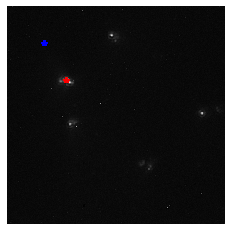

In [32]:
# normalized
all_1 = []
all_2 = []
for j in range(10):
    folder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\trial\Trial 2 (George)\pattern-repeats\p' + str(j+1)
    onlyfiles = [f for f in listdir(folder) if isfile(join(folder, f))]
    
    val1s = []
    val2s = []
    for i in range(5):
        fname = folder + r'\\' + onlyfiles[i]
        im = plt.imread(fname)[600:901,820:1121]
        plt.imshow(im,cmap='gray')
        x,y  = 81,101
        plt.plot(x,y,'r*')
        plt.plot(50,50,'b*')
        plt.axis('off')
        val1 = im[y,x]
        val2 = im[50,50]
        imax = np.sum(im)
        val1s.append(val1/imax)
        val2s.append(val2/imax)
        print(imax)
        
    all_1.append(val1s)
    all_2.append(val2s)

Text(0, 0.5, 'Forward + inverse \n intensity sum')

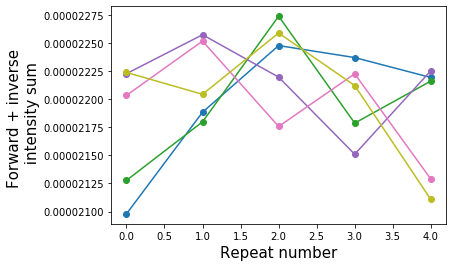

In [34]:
for i in range(5):
    c = cmap(i/5)
    fwd = all_2[2*i]
    inv = all_2[2*i+1]
    add = np.array(fwd) + np.array(inv)
    
    plt.plot(add,'o-',color=c)
    
plt.xlabel('Repeat number',fontsize=15)
plt.ylabel('Forward + inverse \n intensity sum',fontsize=15)

In [16]:
all_1[0]

[0.93141067, 0.99562067, 0.72755015, 0.83863586, 0.82520789]